# Project- Categorize food items on the basis of Food's nutition value and get some insight

##    Import all required libraries like numpy, pandas sklearn etc.¶

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
import re
## Importing these following library for model implimentation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
%matplotlib inline

In [2]:
## Importing this to avoid warning 
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Loading 'nutrition.csv' Dataset

- we are using read_csv() command from pandas library to load the 'nutrition.csv' dataset.

In [3]:
data=pd.read_csv('nutrition.csv')

In [4]:
data.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


### In 'data', we have column 'Unnamed: 0' , we are dropping it

In [5]:
data.drop(['Unnamed: 0'],inplace= True,axis=1)

In [6]:
data.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [7]:
data.shape

(8789, 76)

### since all nutrition facts are given per 100gm,so i am droping column 'serving_size' and further all  analyse will based  serving size per 100gm 

In [8]:
data.drop(labels='serving_size',axis=1,inplace = True)

In [9]:
data.head()

,name,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


## Doing some data cleaning and manipulation

In [10]:
data.isna().sum().sort_values(ascending=False)

saturated_fat    1590
water               0
calcium             0
vitamin_b12         0
vitamin_b6          0
                 ... 
proline             0
serine              0
threonine           0
tryptophan          0
name                0
Length: 75, dtype: int64

### Some of the columns contain NaN value,  I am substituing  this Null value with  0.( Assuming NaN means that nutrition is not present)

In [11]:
data.fillna(0, inplace = True)

###  Know about Data type

In [12]:
print(data.dtypes,'\n\n',data.dtypes.value_counts())

name             object
calories          int64
total_fat        object
saturated_fat    object
cholesterol      object
                  ...  
alcohol          object
ash              object
caffeine         object
theobromine      object
water            object
Length: 75, dtype: object 

 object    73
int64      2
dtype: int64


### we have 73 columns which are object data type , we need to remove all the non-numerical text (except 'name' column) in the data. I  want to transform all the numerical data except calories to have the same measurement  unit(miligram)

##  Three different measurment are used  IU, mg, g 

#### 1g=1000mg   and  1mg= 1mg , 1mcg = 0.001 mg, 1 IU = 0.03 mcg=0.00003 mg  (vitamin_d ,vitamin_a)



In [13]:
col_name = data.drop('name',axis = 1).select_dtypes(exclude = 'number').columns
col_name

Index(['total_fat', 'saturated_fat', 'cholesterol', 'sodium', 'choline',
       'folate', 'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin',
       'thiamin', 'vitamin_a', 'vitamin_a_rae', 'carotene_alpha',
       'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin',
       'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e',
       'tocopherol_alpha', 'vitamin_k', 'calcium', 'copper', 'irom',
       'magnesium', 'manganese', 'phosphorous', 'potassium', 'selenium',
       'zink', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine',
       'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine',
       'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine',
       'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate',
       'fiber', 'sugars', 'fructose', 'galactose', 'glucose', 'lactose',
       'maltose', 'sucrose', 'fat', 'saturated_fatty_acids',
       'monounsaturated_fatty_acids', 'polyunsaturated_fatt

### Removing unit attached with value and change into float data type

In [14]:
for col in col_name :
    for i in data[col]:
        replace = []
        if i == '0' or i == 0:
            pass
        else:
            point = re.findall('[a-zA-Z]+',i)
           
            if point == ['g']:
                for j in data[col]:
                    if j == '0' or j == 0:
                        replace.append(float(j))
                    else:
                        replace.append(float(re.sub('[a-zA-Z]','',j))*1000)
                        
            elif point == ['mcg']:
                for j in data[col]:
                    if j == '0' or j == 0:
                        replace.append(float(j))
                    else:
                        replace.append(float(re.sub('[a-zA-Z]','',j))/1000)
                        
            elif point == ['IU'] or point == ['iu']:
                for j in data[col]:
                    if j == '0' or j == 0:
                        replace.append(float(j))
                    else:
                        replace.append(float(re.sub('[a-zA-Z]','',j))*0.00003)
            else:
                 for j in data[col]:
                    if j == '0' or j == 0:
                        replace.append(float(j))
                    else:       
                        replace.append(float(re.sub('[a-zA-Z]','',j)))
                        
            data[col] = replace    
            data.rename({col:col+'(mg)'}, axis =1, inplace = True)
            break

In [15]:
data.head(5)

,name,calories,total_fat(mg),saturated_fat(mg),cholesterol(mg),sodium(mg),choline(mg),folate(mg),folic_acid(mg),niacin(mg),...,fat(mg),saturated_fatty_acids(mg),monounsaturated_fatty_acids(mg),polyunsaturated_fatty_acids(mg),fatty_acids_total_trans(mg),alcohol(mg),ash(mg),caffeine(mg),theobromine(mg),water(mg)
0,Cornstarch,381,100.0,0.0,0.0,9.0,0.4,0.000,0.0,0.000,...,50.0,9.0,16.0,25.0,0.0,0.0,90.0,0.0,0.0,8320.0
1,"Nuts, pecans",691,72000.0,6200.0,0.0,0.0,40.5,0.022,0.0,1.167,...,71970.0,6180.0,40801.0,21614.0,0.0,0.0,1490.0,0.0,0.0,3520.0
2,"Eggplant, raw",25,200.0,0.0,0.0,2.0,6.9,0.022,0.0,0.649,...,180.0,34.0,16.0,76.0,0.0,0.0,660.0,0.0,0.0,92300.0
3,"Teff, uncooked",367,2400.0,400.0,0.0,12.0,13.1,0.000,0.0,3.363,...,2380.0,449.0,589.0,1071.0,0.0,0.0,2370.0,0.0,0.0,8820.0
4,"Sherbet, orange",144,2000.0,1200.0,1.0,46.0,7.7,0.004,0.0,0.063,...,2000.0,1160.0,530.0,80.0,1.0,0.0,400.0,0.0,0.0,66100.0


###  In 'name' column, we have many sub-varity of a food name, for example, I am choosing just random index to show

In [16]:
print(data['name'][8784:8800]) 

8784    Beef, raw, all grades, trimmed to 0" fat, sepa...
8785    Lamb, cooked, separable lean only, composite o...
8786    Lamb, raw, separable lean and fat, composite o...
8787    Beef, raw, all grades, trimmed to 0" fat, sepa...
8788    Beef, raw, all grades, trimmed to 0" fat, sepa...
Name: name, dtype: object


###  creating food_category columns use 1st part of food name . for example food name 
     'Beef, raw, all grades, trimmed to 0" fat, separable lean and fat, boneless, top round roast, round' to 'Beef'
      in this example 'beef' will be food category 
      
### creating a food category column

In [17]:
data['food_category'] = data['name'].apply(lambda x: x.split(',')[0])

In [18]:
## Number of unique food category name

data.food_category.unique().shape 

(1101,)

In [19]:
## Making all elements in 'food_category' column in lower case
data['food_category']=data['food_category'].str.strip()
data['food_category']=data['food_category'].str.lower()

###  Rearranging columns order
###  bring food_category columns in 1st palce and doing some other rearrangement

In [20]:
data.columns

Index(['name', 'calories', 'total_fat(mg)', 'saturated_fat(mg)',
       'cholesterol(mg)', 'sodium(mg)', 'choline(mg)', 'folate(mg)',
       'folic_acid(mg)', 'niacin(mg)', 'pantothenic_acid(mg)',
       'riboflavin(mg)', 'thiamin(mg)', 'vitamin_a(mg)', 'vitamin_a_rae(mg)',
       'carotene_alpha(mg)', 'carotene_beta(mg)', 'cryptoxanthin_beta(mg)',
       'lutein_zeaxanthin(mg)', 'lucopene', 'vitamin_b12(mg)',
       'vitamin_b6(mg)', 'vitamin_c(mg)', 'vitamin_d(mg)', 'vitamin_e(mg)',
       'tocopherol_alpha(mg)', 'vitamin_k(mg)', 'calcium(mg)', 'copper(mg)',
       'irom(mg)', 'magnesium(mg)', 'manganese(mg)', 'phosphorous(mg)',
       'potassium(mg)', 'selenium(mg)', 'zink(mg)', 'protein(mg)',
       'alanine(mg)', 'arginine(mg)', 'aspartic_acid(mg)', 'cystine(mg)',
       'glutamic_acid(mg)', 'glycine(mg)', 'histidine(mg)',
       'hydroxyproline(mg)', 'isoleucine(mg)', 'leucine(mg)', 'lysine(mg)',
       'methionine(mg)', 'phenylalanine(mg)', 'proline(mg)', 'serine(mg)',
       't

### creating new Dataframe 'arranged_data' with coping 'data' Dataframe ' and deep= True'

In [21]:
arranged_data= data[['food_category','name', 'calories', 'total_fat(mg)', 'saturated_fat(mg)','protein(mg)','cholesterol(mg)', 'sodium(mg)', 'choline(mg)', 'folate(mg)',
       'folic_acid(mg)', 'niacin(mg)', 'pantothenic_acid(mg)','water(mg)','riboflavin(mg)', 'thiamin(mg)', 'vitamin_a(mg)', 'vitamin_a_rae(mg)',
       'carotene_alpha(mg)', 'carotene_beta(mg)', 'cryptoxanthin_beta(mg)','lutein_zeaxanthin(mg)', 'lucopene', 'vitamin_b12(mg)',
       'vitamin_b6(mg)', 'vitamin_c(mg)', 'vitamin_d(mg)', 'vitamin_e(mg)', 'tocopherol_alpha(mg)', 'vitamin_k(mg)', 'calcium(mg)', 'copper(mg)',
       'irom(mg)', 'magnesium(mg)', 'manganese(mg)', 'phosphorous(mg)','potassium(mg)', 'selenium(mg)', 'zink(mg)',
       'alanine(mg)', 'arginine(mg)', 'aspartic_acid(mg)', 'cystine(mg)','glutamic_acid(mg)', 'glycine(mg)', 'histidine(mg)',
       'hydroxyproline(mg)', 'isoleucine(mg)', 'leucine(mg)', 'lysine(mg)','methionine(mg)', 'phenylalanine(mg)', 'proline(mg)', 'serine(mg)',
       'threonine(mg)', 'tryptophan(mg)', 'tyrosine(mg)', 'valine(mg)','carbohydrate(mg)', 'fiber(mg)', 'sugars(mg)', 'fructose(mg)',
       'galactose(mg)', 'glucose(mg)', 'lactose(mg)', 'maltose(mg)','sucrose(mg)', 'fat(mg)', 'saturated_fatty_acids(mg)',
       'monounsaturated_fatty_acids(mg)', 'polyunsaturated_fatty_acids(mg)','fatty_acids_total_trans(mg)', 'alcohol(mg)', 'ash(mg)', 'caffeine(mg)','theobromine(mg)']].copy(deep=True)


In [22]:
arranged_data.head()

,food_category,name,calories,total_fat(mg),saturated_fat(mg),protein(mg),cholesterol(mg),sodium(mg),choline(mg),folate(mg),...,sucrose(mg),fat(mg),saturated_fatty_acids(mg),monounsaturated_fatty_acids(mg),polyunsaturated_fatty_acids(mg),fatty_acids_total_trans(mg),alcohol(mg),ash(mg),caffeine(mg),theobromine(mg)
0,cornstarch,Cornstarch,381,100.0,0.0,260.0,0.0,9.0,0.4,0.000,...,0.0,50.0,9.0,16.0,25.0,0.0,0.0,90.0,0.0,0.0
1,nuts,"Nuts, pecans",691,72000.0,6200.0,9170.0,0.0,0.0,40.5,0.022,...,3900.0,71970.0,6180.0,40801.0,21614.0,0.0,0.0,1490.0,0.0,0.0
2,eggplant,"Eggplant, raw",25,200.0,0.0,980.0,0.0,2.0,6.9,0.022,...,260.0,180.0,34.0,16.0,76.0,0.0,0.0,660.0,0.0,0.0
3,teff,"Teff, uncooked",367,2400.0,400.0,13300.0,0.0,12.0,13.1,0.000,...,620.0,2380.0,449.0,589.0,1071.0,0.0,0.0,2370.0,0.0,0.0
4,sherbet,"Sherbet, orange",144,2000.0,1200.0,1100.0,1.0,46.0,7.7,0.004,...,0.0,2000.0,1160.0,530.0,80.0,1.0,0.0,400.0,0.0,0.0


##  DO you want to know about nutrition value of your favourite food item's or similar food items ?   Enter food name .

In [23]:
# inter your Dish name get info anout per 100 gm serving size
pd.set_option("display.max_colwidth", -1)

food_name = input('enter food name :')
name_list = arranged_data[arranged_data['name'].str.contains(food_name[0].upper()+food_name[1:].lower(), na=False)]

if len(arranged_data[arranged_data['name'].str.contains(food_name[0].upper()+food_name[1:].lower(), na=False)]) != 0 :
    display(name_list)
    
    
else :
    print('this food name or similar name is not present in our list')

enter food name :banana


,food_category,name,calories,total_fat(mg),saturated_fat(mg),protein(mg),cholesterol(mg),sodium(mg),choline(mg),folate(mg),...,sucrose(mg),fat(mg),saturated_fatty_acids(mg),monounsaturated_fatty_acids(mg),polyunsaturated_fatty_acids(mg),fatty_acids_total_trans(mg),alcohol(mg),ash(mg),caffeine(mg),theobromine(mg)
613,bananas,"Bananas, raw",89,300.0,100.0,1090.0,0.0,1.0,9.8,0.020,...,2390.0,330.0,112.0,32.0,73.0,0.0,0.0,820.0,0.0,0.0
1654,silk banana-strawberry soy yogurt,SILK Banana-Strawberry soy yogurt,88,1200.0,0.0,2350.0,0.0,15.0,0.0,0.000,...,0.0,1180.0,0.0,0.0,0.0,0.0,0.0,1240.0,0.0,0.0
2467,bananas,"Bananas, or banana powder, dehydrated",346,1800.0,700.0,3890.0,0.0,3.0,19.6,0.014,...,0.0,1810.0,698.0,153.0,337.0,0.0,0.0,3020.0,0.0,0.0
2881,babyfood,"Babyfood, Banana with orange medley, GERBER",86,0.0,0.0,1060.0,0.0,10.0,8.8,0.031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,620.0,0.0,0.0
3595,beverages,"Beverages, Strawberry Banana, V8 V-FUSION Juices",49,0.0,0.0,410.0,0.0,28.0,0.0,0.003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
4217,beverages,"Beverages, Strawberry Banana, V8 SPLASH Juice Drinks",29,0.0,0.0,0.0,0.0,21.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,390.0,0.0,0.0
4409,cereals,"Cereals, dry, Banana Bread, Instant Oatmeal, QUAKER",368,4900.0,900.0,8970.0,0.0,700.0,0.0,0.247,...,0.0,4850.0,900.0,1730.0,1430.0,0.0,0.0,3720.0,0.0,0.0
4734,beverages,"Beverages, Strawberry Banana, V8 SPLASH Smoothies",37,0.0,0.0,1220.0,0.0,29.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,0.0,0.0
4918,cereals ready-to-eat,"Cereals ready-to-eat, POST GREAT GRAINS Banana Nut Crunch",390,8800.0,1100.0,9800.0,0.0,238.0,20.3,0.339,...,0.0,8800.0,1100.0,3780.0,3440.0,0.0,0.0,4900.0,0.0,0.0
4931,cereals ready-to-eat,"Cereals ready-to-eat, Banana Nut, CHEERIOS, GENERAL MILLS",375,4000.0,700.0,5500.0,0.0,533.0,14.7,0.714,...,0.0,4000.0,690.0,1200.0,1890.0,0.0,0.0,3500.0,0.0,0.0


## Food with high Protein and low Calories

### Coosing foods which have protein percentage more than 30 percent

In [24]:

data_high_protein =data.loc[data['protein(mg)']>=30000, ['name','protein(mg)', 'calories']]

In [25]:

pd.set_option("display.max_colwidth", -1)

# sort with 
# priority 1: low calories
# priority 2: high protein
data_high_protein = data_high_protein.sort_values(by=['calories', 'protein(mg)'], ascending=[True, False],ignore_index= True).head(15)
data_high_protein


,name,protein(mg),calories
0,"Turkey, roasted, meat only, from whole bird, drumstick",30130.0,139
1,"Cheese, nonfat, mozzarella",31700.0,141
2,"Buffalo, cooked (Shoshone Bannock), top round steak, free range",32510.0,146
3,"Game meat, roasted, cooked, elk",30190.0,146
4,"Turkey, roasted, meat only, from whole bird, wing",30130.0,147
5,"Turkey, roasted, cooked, light meat, all classes",30130.0,147
6,"Turkey, roasted, meat only, from whole bird, breast",30130.0,147
7,"Elk, cooked (Shoshone Bannock), eye of round, roast, free range",30560.0,148
8,"Game meat, broiled, cooked, 1"" steak, separable lean only, loin, deer",30200.0,150
9,"Veal, grilled, cooked, boneless, cutlet, cap off, top round, leg",31890.0,151


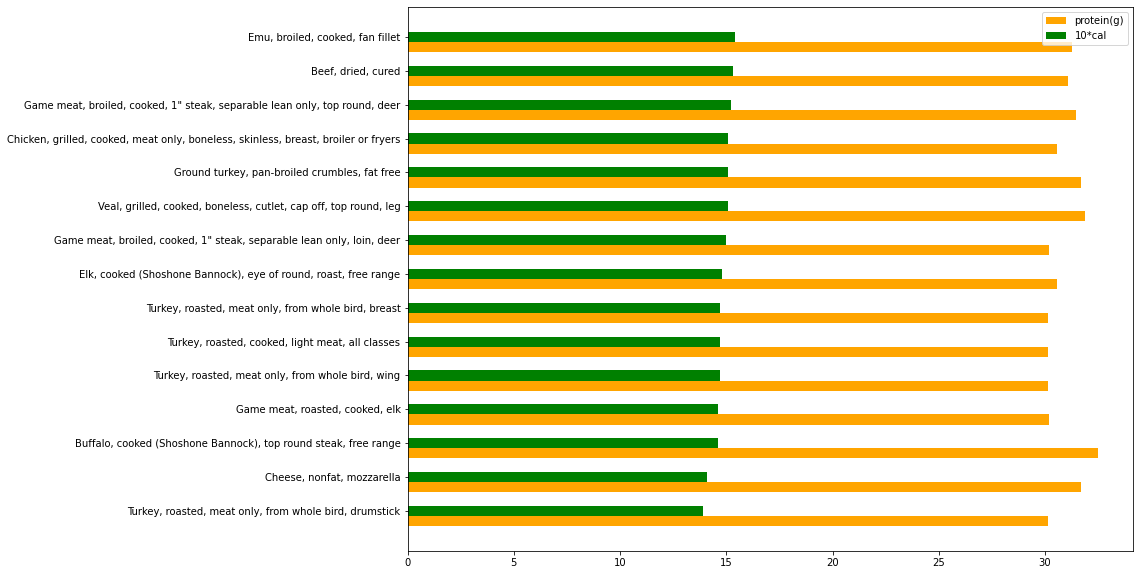

In [26]:
data_high_protein['protein(g)'] = data_high_protein['protein(mg)']/1000
data_high_protein['10*cal'] =  data_high_protein['calories']/10
ind = np.arange(len(data_high_protein))
width = 0.3

fig, ax = plt.subplots(figsize=(13,10))
ax.barh(ind, data_high_protein['protein(g)'], width, color='orange', label='protein(g)')
ax.barh(ind + width, data_high_protein['10*cal'], width, color='green', label='10*cal')

ax.set(yticks=ind + width, yticklabels=data_high_protein.name)
ax.legend()

plt.show()

## Products with high Protein and low Total Fat

In [27]:
# rows with more than 30g proteins

data_high_protein = data.loc[data['protein(mg)']>=30000, ['name','protein(mg)', 'total_fat(mg)']]

# sort with 
# priority 1: low total_fat
# priority 2: high protein

data_high_protein_low_fat = data_high_protein.sort_values(by=['total_fat(mg)', 'protein(mg)'], ascending=[True, False]).head(15)
data_high_protein_low_fat

,name,protein(mg),total_fat(mg)
5357,"Egg, glucose reduced, stabilized, powder, dried, white",82400.0,0.0
389,"Egg, dried, white",81100.0,0.0
5356,"Egg, glucose reduced, stabilized, flakes, dried, white",76920.0,0.0
7259,"Gelatin desserts, no added sodium, with aspartame, reduced calorie, dry mix",55300.0,0.0
8491,"Gelatin desserts, vitamin C, sodium, potassium, added phosphorus, with aspartame, reduced calorie, dry mix",55300.0,0.0
2662,"Cheese, nonfat or fat free, cheddar",32140.0,0.0
1021,"Cheese, nonfat, mozzarella",31700.0,0.0
1618,"Gelatins, unsweetened, dry powder",85600.0,100.0
1478,"Milk, calcium reduced, nonfat, dry",35500.0,200.0
3893,"Egg, glucose reduced, stabilized, dried, white",84080.0,300.0


### Since, most of calories come from fat portions of a food item,so we want to know how calories and fat in a food are associated 

Text(0.5, 0, 'Total fat(mg)')

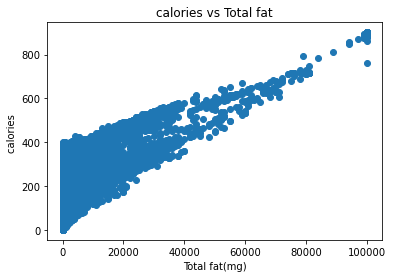

In [28]:

plt.scatter('total_fat(mg)','calories',data=data)
plt.title('calories vs Total fat')
plt.ylabel('calories ')
plt.xlabel('Total fat(mg)')

- we can see calories and total fat in a food are positivly associated

In [29]:
data.agg(['mean', 'median', 'std', 'skew', 'kurtosis'])

,calories,total_fat(mg),saturated_fat(mg),cholesterol(mg),sodium(mg),choline(mg),folate(mg),folic_acid(mg),niacin(mg),pantothenic_acid(mg),...,fat(mg),saturated_fatty_acids(mg),monounsaturated_fatty_acids(mg),polyunsaturated_fatty_acids(mg),fatty_acids_total_trans(mg),alcohol(mg),ash(mg),caffeine(mg),theobromine(mg),water(mg)
mean,226.283878,10556.855160,3434.281488,38.723063,306.353851,23.681249,0.044086,0.017639,3.400145,0.484268,...,10550.794175,3434.146433,3772.312664,2114.332461,38.723063,117.521902,1717.408124,2.608829,4.695642,54112.074184
median,191.000000,5100.000000,1400.000000,2.000000,84.000000,1.600000,0.009000,0.000000,2.111000,0.274000,...,5130.000000,1435.000000,1600.000000,591.000000,2.000000,0.000000,1170.000000,0.000000,0.000000,63080.000000
std,169.862001,15818.247457,6429.757722,117.358944,939.220468,51.332265,0.127670,0.100736,4.765302,1.251570,...,15814.870045,6426.585947,6826.234392,5050.045357,117.358944,1600.127357,2967.750692,82.070233,60.962608,30772.998808
skew,1.149091,3.309571,6.671286,15.322120,22.541058,15.670711,8.955403,10.960558,6.483232,14.880011,...,3.310439,6.664194,4.687086,6.361312,15.322120,18.086341,17.018619,51.058264,28.478954,-0.570849
kurtosis,1.713243,13.754812,71.289600,313.379845,681.887714,587.116891,140.040959,173.398893,99.529939,306.924940,...,13.759355,71.082476,30.928134,55.713876,313.379845,374.335878,433.302166,3063.013427,1002.039664,-1.034245


###  we are removing all columns which are having zero value more than 60 percent

In [30]:
threshold = len(data)*0.6
removed_columns = []
## droping all columns which are having only zero value more than 60%
for col in data.drop(['food_category'],axis=1).columns :
    
    if len(data[data[col]==0]) >= threshold :
        removed_columns.append(col)
removed_columns       

['folic_acid(mg)',
 'carotene_alpha(mg)',
 'carotene_beta(mg)',
 'cryptoxanthin_beta(mg)',
 'lutein_zeaxanthin(mg)',
 'lucopene',
 'vitamin_d(mg)',
 'hydroxyproline(mg)',
 'fructose(mg)',
 'galactose(mg)',
 'glucose(mg)',
 'lactose(mg)',
 'maltose(mg)',
 'sucrose(mg)',
 'alcohol(mg)',
 'caffeine(mg)',
 'theobromine(mg)']

In [31]:
arranged_data.drop(removed_columns,axis=1,inplace= True)

In [32]:
data.drop(removed_columns,axis=1,inplace= True)

In [33]:
data.shape

(8789, 59)

In [34]:
arranged_data.shape

(8789, 59)

## In this data set we do not have any target variable , so it is better to  let machine to get some insight by using unsupervise model 

### try to know data distribution 

In [35]:
data.calories.describe()

count    8789.000000
mean     226.283878 
std      169.862001 
min      0.000000   
25%      91.000000  
50%      191.000000 
75%      337.000000 
max      902.000000 
Name: calories, dtype: float64

<AxesSubplot:xlabel='calories'>

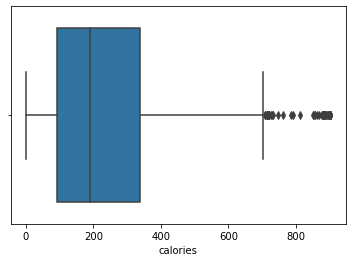

In [36]:
# Box Plot
sns.boxplot(data['calories'])

<AxesSubplot:xlabel='total_fat(mg)'>

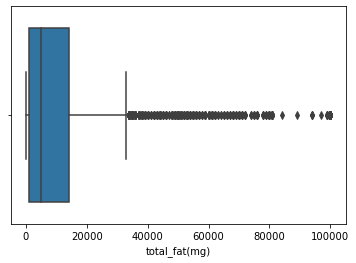

In [37]:
# Box Plot
sns.boxplot(data['total_fat(mg)'])

-  From above two Boxplot,we can see  there is huge number of outlier and rightly skewed

### Try to find out which type of food category contribute high number in outlier

In [38]:
#     USING Interquartile Range (IQR)

Q1 = np.percentile(data['calories'], 25,interpolation = 'midpoint')

Q3 = np.percentile(data['calories'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
data[(data['calories'] < Q1-1.5*IQR) | (data['calories'] > Q3+1.5*IQR) ]['food_category'].value_counts()

oil                                                     74
margarine                                               12
shortening                                              10
nuts                                                    8 
fat                                                     6 
fish oil                                                6 
pork                                                    4 
shortening frying (heavy duty)                          3 
butter                                                  3 
margarine-like                                          2 
beef                                                    2 
salad dressing                                          2 
usda commodity food                                     2 
shortening industrial                                   2 
caribou                                                 1 
shortening confectionery                                1 
shortening cake mix                                     

- mostly food come in outlier from oil category , which are expected from Box plot

In [39]:
scaler = StandardScaler()
training = pd.DataFrame(scaler.fit_transform(arranged_data.drop(['name','food_category'],axis=1)), columns = arranged_data.drop(['name','food_category'], axis =1).columns)

In [40]:
training

,calories,total_fat(mg),saturated_fat(mg),protein(mg),cholesterol(mg),sodium(mg),choline(mg),folate(mg),niacin(mg),pantothenic_acid(mg),...,valine(mg),carbohydrate(mg),fiber(mg),sugars(mg),fat(mg),saturated_fatty_acids(mg),monounsaturated_fatty_acids(mg),polyunsaturated_fatty_acids(mg),fatty_acids_total_trans(mg),ash(mg)
0,0.910886,-0.661100,-0.534153,-1.052765,-0.329973,-0.316614,-0.453566,-0.345327,-0.713562,-0.386951,...,-0.750011,2.536175,-0.267062,-0.492509,-0.664020,-0.532995,-0.550307,-0.413749,-0.329973,-0.548395
1,2.736001,3.884542,0.430168,-0.206611,-0.329973,-0.326197,0.327663,-0.172999,-0.468653,0.302623,...,-0.048722,-0.303026,1.770915,-0.203111,3.883857,0.427289,5.424776,3.861505,-0.329973,-0.076631
2,-1.185052,-0.654778,-0.534153,-0.984389,-0.329973,-0.324068,-0.326933,-0.172999,-0.577361,-0.162420,...,-0.681119,-0.595712,0.224863,-0.235185,-0.655800,-0.529105,-0.550307,-0.403650,-0.329973,-0.356320
3,0.828461,-0.515690,-0.471939,0.185601,-0.329973,-0.313420,-0.206144,-0.345327,-0.007795,0.365747,...,0.437057,1.870846,1.396115,-0.358380,-0.516682,-0.464526,-0.466362,-0.206610,-0.329973,0.219907
4,-0.484444,-0.540979,-0.347511,-0.972993,-0.321452,-0.277218,-0.311347,-0.313995,-0.700341,-0.207965,...,-0.774742,0.303619,-0.173362,1.280330,-0.540711,-0.353886,-0.475005,-0.402857,-0.321452,-0.443933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,-0.596305,-0.446147,-0.316403,1.149514,0.198351,-0.268700,0.795232,-0.313995,0.634173,-0.102492,...,1.295562,-0.811375,-0.477888,-0.492509,-0.445859,-0.323852,-0.324987,-0.370381,0.198351,-0.204681
8785,-0.119421,-0.104749,0.072436,1.732610,0.598855,-0.272959,-0.461359,-0.345327,0.898180,0.076494,...,2.046312,-0.811375,-0.477888,-0.492509,-0.106918,0.066268,-0.042824,-0.315725,0.598855,-0.039564
8786,0.298589,0.786677,1.332275,0.512287,0.334693,-0.284671,-0.461359,-0.337494,0.661036,0.028551,...,0.820381,-0.811375,-0.477888,-0.492509,0.770787,1.266040,0.724846,-0.224631,0.334693,-0.268706
8787,-0.619855,-0.477757,-0.363064,1.141917,0.181308,-0.269764,0.789388,-0.313995,0.696712,-0.103291,...,1.449245,-0.811375,-0.477888,-0.492509,-0.474947,-0.365401,-0.367180,-0.372559,0.181308,-0.208051


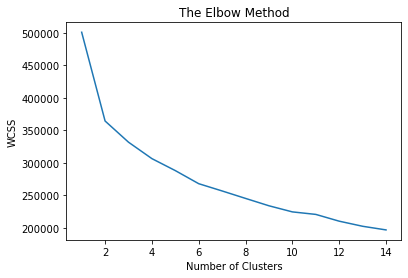

In [41]:
## plot  Elbow to get number of cluster
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(training )
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- from above figure Kmean is not good fit, we are not getting converse Elbow curve , becasue of highly skewed data and outlier

### Appling hierarchical clustering model  ( AgglomerativeClustering)

### Importing some Library for model implimentation

###  Preprocessing the data

In [42]:
# Scaling the data so that all the features become comparable
# Normalizing the data so that the data approximately
# follows a Gaussian distribution

X_normalized = normalize(training)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [43]:
## Reducing the dimensionality of the Data

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

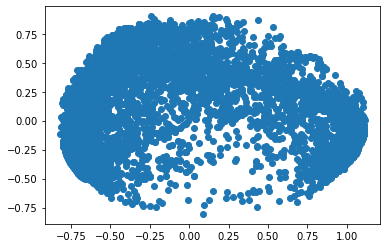

In [44]:
plt.scatter (x=X_principal.P1,y=X_principal.P2)

## Visualizing the working of the Dendograms

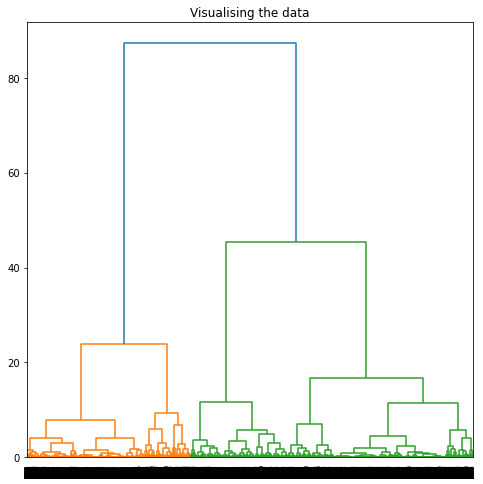

In [45]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))
Dendrogram
plt.show()

#### Evaluating the different models and Visualizing the results. on basis of different number of cluster  = [2, 3, 4, 5]




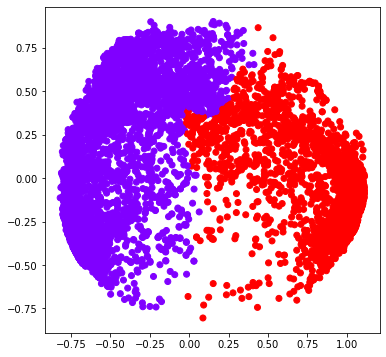

In [46]:
ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

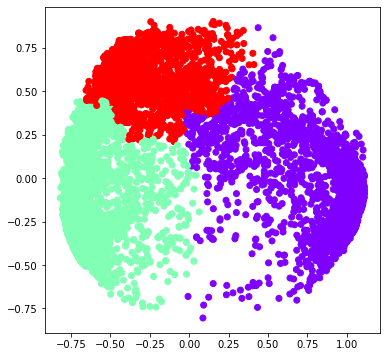

In [47]:
ac3 = AgglomerativeClustering(n_clusters = 3)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

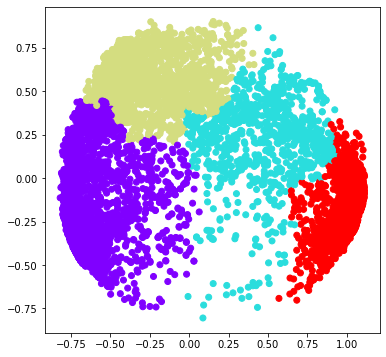

In [48]:
ac4 = AgglomerativeClustering(n_clusters = 4)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

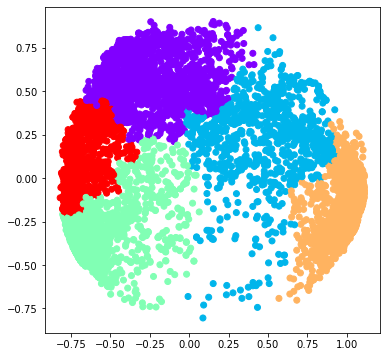

In [49]:
ac5 = AgglomerativeClustering(n_clusters = 5)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

### Compare Silhouette_score to  choose optimum number of cluster 

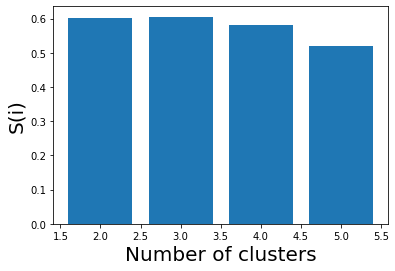

In [50]:
k = [2, 3, 4, 5]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [51]:
print(silhouette_score(X_principal, ac2.fit_predict(X_principal)),silhouette_score(X_principal, ac3.fit_predict(X_principal)))

0.6023725761136409 0.6053575761872411


-  in both case (no of cluster=2, co of cluster =3) have almost equal value for silhouette score and highest among all above defined number of cluster

-  so i am choosing number of cluster eaqul to 2 to get more compact cluster than number of cluster eaqul to 3

In [52]:
T=ac2.fit_predict(X_principal)

In [53]:
T

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [54]:
training['label'] = T

In [55]:
print(len(training), len(arranged_data))

8789 8789


In [56]:
arranged_data['label']=training['label']

In [57]:
arranged_data.head()

,food_category,name,calories,total_fat(mg),saturated_fat(mg),protein(mg),cholesterol(mg),sodium(mg),choline(mg),folate(mg),...,carbohydrate(mg),fiber(mg),sugars(mg),fat(mg),saturated_fatty_acids(mg),monounsaturated_fatty_acids(mg),polyunsaturated_fatty_acids(mg),fatty_acids_total_trans(mg),ash(mg),label
0,cornstarch,Cornstarch,381,100.0,0.0,260.0,0.0,9.0,0.4,0.000,...,91270.0,900.0,0.0,50.0,9.0,16.0,25.0,0.0,90.0,0
1,nuts,"Nuts, pecans",691,72000.0,6200.0,9170.0,0.0,0.0,40.5,0.022,...,13860.0,9600.0,3970.0,71970.0,6180.0,40801.0,21614.0,0.0,1490.0,0
2,eggplant,"Eggplant, raw",25,200.0,0.0,980.0,0.0,2.0,6.9,0.022,...,5880.0,3000.0,3530.0,180.0,34.0,16.0,76.0,0.0,660.0,0
3,teff,"Teff, uncooked",367,2400.0,400.0,13300.0,0.0,12.0,13.1,0.000,...,73130.0,8000.0,1840.0,2380.0,449.0,589.0,1071.0,0.0,2370.0,1
4,sherbet,"Sherbet, orange",144,2000.0,1200.0,1100.0,1.0,46.0,7.7,0.004,...,30400.0,1300.0,24320.0,2000.0,1160.0,530.0,80.0,1.0,400.0,0


### Try to kwow which type of food category mostly come under in  these two defined cluster

- food category List and corresponding food come under cluster with label = 0

In [58]:
arranged_data[arranged_data['label']==0]['food_category'].value_counts()    

beverages                 269
cereals ready-to-eat      243
babyfood                  226
soup                      171
candies                   133
                         ... 
vegetarian fillets        1  
melon balls               1  
loma linda redi-burger    1  
sweet potato puffs        1  
arby's                    1  
Name: food_category, Length: 948, dtype: int64

- food category List and corresponding food come under cluster with label = 1

In [59]:
arranged_data[arranged_data['label']==1]['food_category'].value_counts() 

beef                                             938
pork                                             304
lamb                                             287
fish                                             206
chicken                                          193
                                                ... 
macaroni and cheese dinner with dry sauce mix    1  
quinoa                                           1  
infant formula                                   1  
papad                                            1  
corn                                             1  
Name: food_category, Length: 279, dtype: int64

### To understand nutrition distribution in these two cluster . i just select some colmuns out all given columns

In [60]:
lists = ['food_category','name', 'calories', 'sugars(mg)','protein(mg)','total_fat(mg)','irom(mg)','cholesterol(mg)','water(mg)','carbohydrate(mg)']

In [61]:
arranged_data[arranged_data['label']==1][lists].describe()

,calories,sugars(mg),protein(mg),total_fat(mg),irom(mg),cholesterol(mg),water(mg),carbohydrate(mg)
count,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000
mean,231.299071,985.817337,21984.136223,12164.210526,3.064201,89.670588,55467.455108,8523.272446
std,110.167865,4516.963752,8004.176518,11430.141713,6.231344,178.039570,21006.267797,19073.833361
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153.000000,0.000000,17292.500000,4600.000000,1.070000,55.000000,51302.500000,0.000000
50%,206.000000,0.000000,21720.000000,8800.000000,1.900000,72.000000,61870.000000,0.000000
75%,282.000000,0.000000,26610.000000,16000.000000,2.820000,89.000000,69500.000000,3322.500000
max,902.000000,74460.000000,88320.000000,100000.000000,123.600000,3100.000000,89040.000000,91000.000000


In [62]:
arranged_data[arranged_data['label']==0][lists].describe()

,calories,sugars(mg),protein(mg),total_fat(mg),irom(mg),cholesterol(mg),water(mg),carbohydrate(mg)
count,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000
mean,223.369851,10109.168915,5164.212988,9622.917791,2.402635,9.120525,53324.543983,30023.266775
std,196.333041,15972.963552,5841.981879,17814.414315,5.286975,31.255679,35203.151026,28182.073542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,0.000000,1105.000000,300.000000,0.280000,0.000000,10260.000000,6970.000000
50%,148.000000,2890.000000,3390.000000,2600.000000,0.890000,0.000000,66290.000000,17650.000000
75%,371.500000,11775.000000,7300.000000,12000.000000,2.300000,4.000000,86000.000000,56000.000000
max,902.000000,99800.000000,75160.000000,100000.000000,67.230000,766.000000,100000.000000,100000.000000


In [63]:
lists1 = ['calories','total_fat(mg)', 'sugars(mg)','protein(mg)','carbohydrate(mg)']

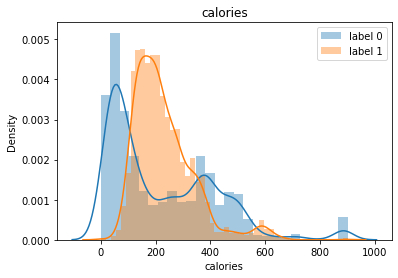

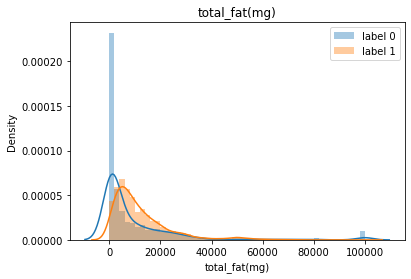

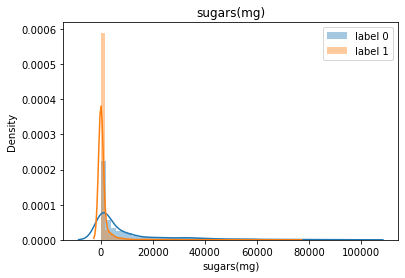

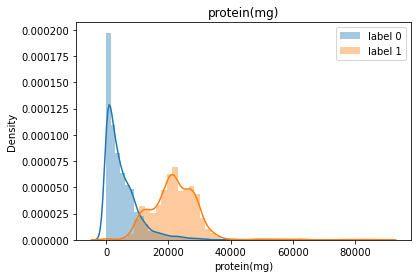

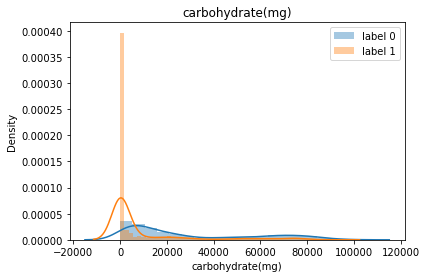

In [64]:
for i in lists1:
    warnings.warn('my warning')
    sns.distplot(arranged_data[arranged_data['label'] == 0][i], label = 'label 0')
    sns.distplot(arranged_data[arranged_data['label'] == 1][i], label = 'label 1')
    plt.title(i)
    plt.legend()
    plt.show()

## Conclusion 

### Label 0 :
- have Top five food categories 1)beverages, 2)cereals ready-to-eat, 3) babyfood, 4)soup, 5) candies
- These all top five cateogry are expected to have low protein, high carbohydrate.

### Label 1 :
- Have top five food categories  1) beef, 2)pork, 3)lamb, 4)fish, 5)chicken
-  These all top five cateogry are expected to have high protein,low carbohydrate and suger .
